In [1]:
import pandas as pd
import sys
import seaborn as sns 

In [2]:
df = pd.read_csv('/Users/dinamaizlis/Downloads/Marketing_Leads_India.csv')

Lead Number - מזהה id
Lead Origin - מאיפה המשתמש
Lead Source - מקור המשתמש     
Do Not Email - איימיל
Do Not Call - מספר
Converted                                           0
TotalVisits- מספר ביקושים
Total Time Spent on Website- כמה זמן ביקר באתר
Page Views Per Visit - מספר צפיות לכל ביקור
Last Activity  - פעילות אחרונה
Country - מדינה
Specialization - התמחות
How did you hear about X Education - מאיפה שמעת על החינוך
What is your current occupation - מהו עיסוכך הנוכחי
What matters most to you in choosing a course- מה הכי חשוב לך בבחירת קרירה
Search - חיפוש
Magazine - מגזין
Newspaper Article - מאמר בעיתון
X Education Forums - פורום חינוכי
Newspaper - עיתון
Digital Advertisement - פירסומת דיגיטלית
Through Recommendations - מהמלצות
Receive More Updates About Our Courses              0
Tags                                                0
Lead Quality                                        0
Update me on Supply Chain Content - עידכן לגבי תוכן ההספקה
Get updates on DM Content - קיבל עדכונים ה dm
Lead Profile - פרופיל
City - עיר
Asymmetrique Activity Index - מדד פעילות אסימטרית
Asymmetrique Profile Index - מדד פרופיל אסימטרי
Asymmetrique Activity Score - ציון פעילות אסמטרי
Asymmetrique Profile Score - ציון פרופיל אסמטרי
I agree to pay the amount through cheque - מסכים לשלם באמצעות צאק
A free copy of Mastering The Interview - עותק של ראיון בחינם
Last Notable Activity - פעילות בולטת לאחרונה

In [3]:
df.shape

(9240, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [5]:
df.duplicated().any()

False

## Data Cleaning

<AxesSubplot:>

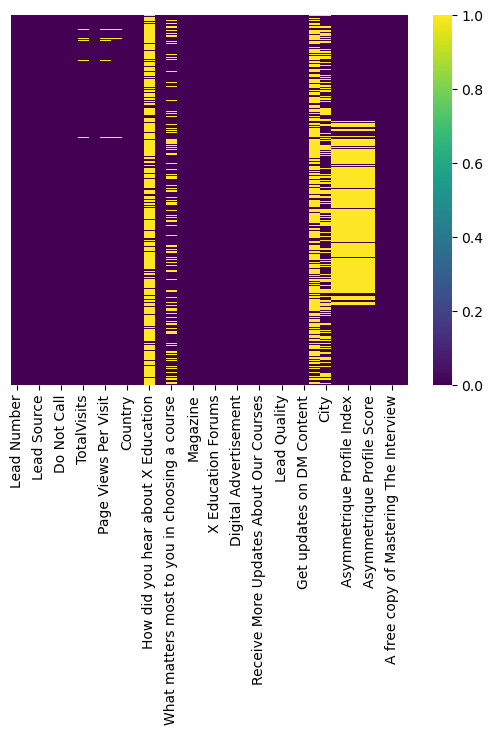

In [6]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')

In [7]:
round((df.isnull().sum()/df.shape[0]*100), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               78.46
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [8]:
#gives percentage of null in every column
null_percentage = df.isnull().sum()/df.shape[0]*100

#gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>40].keys()

df = df.drop(col_to_drop, axis=1)


#col_to_drop =['How did you hear about X Education', 'Lead Profile','Asymmetrique Activity Index',
#'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score']

Lead Number

In [9]:
df["Lead Number"].is_unique
#.describe()

True

Lead Origin

In [10]:
df["Lead Origin"].describe()

#df["status"].value_counts()

count                        9240
unique                          5
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object

Lead Source

In [11]:
df["Lead Source"].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [12]:
#imputing most frequent level
df["Lead Source"].fillna("Google", inplace = True)

Do Not Email 

In [13]:
df["Do Not Email"].describe() 
#drop
#It looks like for many of the variable here, one of the level is highly dominant and the other has almost no contribution. These variable are not useful for the model, so we can drop them.

count     9240
unique       2
top         No
freq      8506
Name: Do Not Email, dtype: object

Do Not Call 

In [14]:
df["Do Not Call"].describe() 
#drop 
#It looks like f

count     9240
unique       2
top         No
freq      9238
Name: Do Not Call, dtype: object

TotalVisits

In [15]:
df["TotalVisits"].describe() 

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [16]:
#imputing median value
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace = True)

Total Time Spent on Website

In [17]:
df["Total Time Spent on Website"].describe() 

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

Page Views Per Visit 

In [18]:
df["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [19]:
#imputing median value
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace = True)

Last Activity

In [20]:
df["Last Activity"].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [21]:
#imputing most frequent level
df["Last Activity"].fillna("Email Opened", inplace = True)

Country

In [22]:
df["Country"].describe() 
#drop 

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object

Specialization 

In [23]:
df["Specialization"].describe() 

count       9240
unique        19
top       Others
freq        3380
Name: Specialization, dtype: object

What is your current occupation

In [24]:
df["What is your current occupation"].describe() 
#drop

count           9240
unique             6
top       Unemployed
freq            8290
Name: What is your current occupation, dtype: object

What matters most to you in choosing a course  

In [25]:
df["What matters most to you in choosing a course"].describe()   
#drop

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

Search

In [26]:
df["Search"].describe()   
#drop

count     9240
unique       2
top         No
freq      9226
Name: Search, dtype: object

Magazine

In [27]:
df["Magazine"].describe()   
#drop 

count     9240
unique       1
top         No
freq      9240
Name: Magazine, dtype: object

Newspaper Article

In [28]:
df["Newspaper Article"].describe()   
#drop

count     9240
unique       2
top         No
freq      9238
Name: Newspaper Article, dtype: object

X Education Forums

In [29]:
df["X Education Forums"].describe()   
#drop

count     9240
unique       2
top         No
freq      9239
Name: X Education Forums, dtype: object

Newspaper

In [30]:
df["Newspaper"].describe()   
#drop

count     9240
unique       2
top         No
freq      9239
Name: Newspaper, dtype: object

Digital Advertisement

In [31]:
df["Digital Advertisement"].describe()   
#drop

count     9240
unique       2
top         No
freq      9236
Name: Digital Advertisement, dtype: object

Through Recommendation

In [32]:
df["Through Recommendations"].describe()   
#drop 

count     9240
unique       2
top         No
freq      9233
Name: Through Recommendations, dtype: object

Receive More Updates About Our Courses

In [33]:
df["Receive More Updates About Our Courses"].describe()   
#drop

count     9240
unique       1
top         No
freq      9240
Name: Receive More Updates About Our Courses, dtype: object

Tags

In [34]:
df["Tags"].describe()   

count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object

Lead Quality

In [35]:
df["Lead Quality"].describe()   

count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead Quality, dtype: object

Update me on Supply Chain Content

In [36]:
df["Update me on Supply Chain Content"].describe()   
#drop

count     9240
unique       1
top         No
freq      9240
Name: Update me on Supply Chain Content, dtype: object

Get updates on DM Content

In [37]:
df["Get updates on DM Content"].describe()   
#drop

count     9240
unique       1
top         No
freq      9240
Name: Get updates on DM Content, dtype: object

City

In [38]:
df["City"].describe()   

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [39]:
#imputing most frequent level
df["City"].fillna("Mumbai", inplace = True)

I agree to pay the amount through cheque

In [40]:
df["I agree to pay the amount through cheque"].describe()   
#drop 

count     9240
unique       1
top         No
freq      9240
Name: I agree to pay the amount through cheque, dtype: object

A free copy of Mastering The Interview

In [41]:
df["A free copy of Mastering The Interview"].describe()

count     9240
unique       2
top         No
freq      6352
Name: A free copy of Mastering The Interview, dtype: object

Last Notable Activity

In [42]:
df["Last Notable Activity"].describe()

count         9240
unique          16
top       Modified
freq          3407
Name: Last Notable Activity, dtype: object

In [43]:
df=df.drop(["Do Not Email","Do Not Call","Country","What is your current occupation", 
         "What matters most to you in choosing a course","Search","Magazine",
        "Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations",
         "Receive More Updates About Our Courses","Update me on Supply Chain Content",
         "Get updates on DM Content","I agree to pay the amount through cheque"], axis=1)

In [44]:
df.shape

(9240, 14)

In [45]:
round((df.isnull().sum()/df.shape[0]*100), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Tags                                      0.0
Lead Quality                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [46]:
df.head(5)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Ringing,Not Sure,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Ringing,Not Sure,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Will revert after reading the email,Might be,Mumbai,No,Modified


In [47]:
df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].map({'Yes': 1, "No": 0})

In [48]:
#Creating Dummy Indicator columns with prefix
df=pd.get_dummies(df, columns=['Lead Origin'], prefix="LeadOrigin_")
df=pd.get_dummies(df, columns=['Lead Source'], prefix="LeadSource_")
df=pd.get_dummies(df, columns=['Last Activity'], prefix="LastActivity_")
df=pd.get_dummies(df, columns=['Specialization'], prefix="Specialization_")
df=pd.get_dummies(df, columns=['Tags'], prefix="Tags_")
df=pd.get_dummies(df, columns=['Lead Quality'], prefix="LeadQuality_")
df=pd.get_dummies(df, columns=['City'], prefix="City_")
df=pd.get_dummies(df, columns=['Last Notable Activity'], prefix="LastNotableActivity_")


In [49]:
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin__API,LeadOrigin__Landing Page Submission,LeadOrigin__Lead Add Form,LeadOrigin__Lead Import,...,LastNotableActivity__Form Submitted on Website,LastNotableActivity__Had a Phone Conversation,LastNotableActivity__Modified,LastNotableActivity__Olark Chat Conversation,LastNotableActivity__Page Visited on Website,LastNotableActivity__Resubscribed to emails,LastNotableActivity__SMS Sent,LastNotableActivity__Unreachable,LastNotableActivity__Unsubscribed,LastNotableActivity__View in browser link Clicked
0,660737,0,0.0,0,0.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
df.shape

(9240, 121)

model